<a href="https://colab.research.google.com/github/Kittisak43/learn-github/blob/main/NARIT_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

data = pd.read_csv('https://raw.githubusercontent.com/Kittisak43/Data/main/data2.csv?token=GHSAT0AAAAAACKYEIVNF7XBJZ2PVQGEBDSAZLBPENQ', index_col='Star')
star = data.fillna(0) #set ค่าว่างให้เท่ากับ 0 กรณีข้อมูลรวมค่าสูญหาย

z = [i for i in star.index]

cols = ['[O/Fe]', '[Na/Fe]', '[Mg/Fe]', '[Si/Fe]']

star1 = pd.read_csv('https://raw.githubusercontent.com/Kittisak43/Data/main/data_Fe.csv?token=GHSAT0AAAAAACKYEIVMCTFHCLJ3ZDRCGJEMZLBPHJQ', index_col='star')
#ข้อมูล [Fe/H]I, [Fe/H]II
cols1 = ['[Fe/H]I', '[Fe/H]II']

In [11]:
#ทดสอบการแจกแจงปกติ
# H0 : ข้อมูลมีการแจกแจงปกติ

stat, p = normaltest(star['[O/Fe]'])
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('ข้อมูล [O/Fe] มีการแจกแจงปกติ (fail to reject H0)')
else:
  print('ข้อมูล [O/Fe] ไม่มีการแจกแจงปกติ (reject H0)')

stat, p = normaltest(star['[Na/Fe]'])
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('ข้อมูล [Na/Fe] มีการแจกแจงปกติ (fail to reject H0)')
else:
  print('ข้อมูล [Na/Fe] ไม่มีการแจกแจงปกติ (reject H0)')

stat, p = normaltest(star['[Mg/Fe]'])
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('ข้อมูล [Mg/Fe] มีการแจกแจงปกติ (fail to reject H0)')
else:
  print('ข้อมูล [Mg/Fe] ไม่มีการแจกแจงปกติ (reject H0)')

stat, p = normaltest(star['[Si/Fe]'])
print('Statistics=%.4f, p=%.4f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('ข้อมูล [Si/Fe] มีการแจกแจงปกติ (fail to reject H0)')
else:
  print('ข้อมูล [Si/Fe] ไม่มีการแจกแจงปกติ (reject H0)')

Statistics=20.6626, p=0.0000
ข้อมูล [O/Fe] ไม่มีการแจกแจงปกติ (reject H0)
Statistics=7.3040, p=0.0259
ข้อมูล [Na/Fe] ไม่มีการแจกแจงปกติ (reject H0)
Statistics=25.0554, p=0.0000
ข้อมูล [Mg/Fe] ไม่มีการแจกแจงปกติ (reject H0)
Statistics=15.9441, p=0.0003
ข้อมูล [Si/Fe] ไม่มีการแจกแจงปกติ (reject H0)


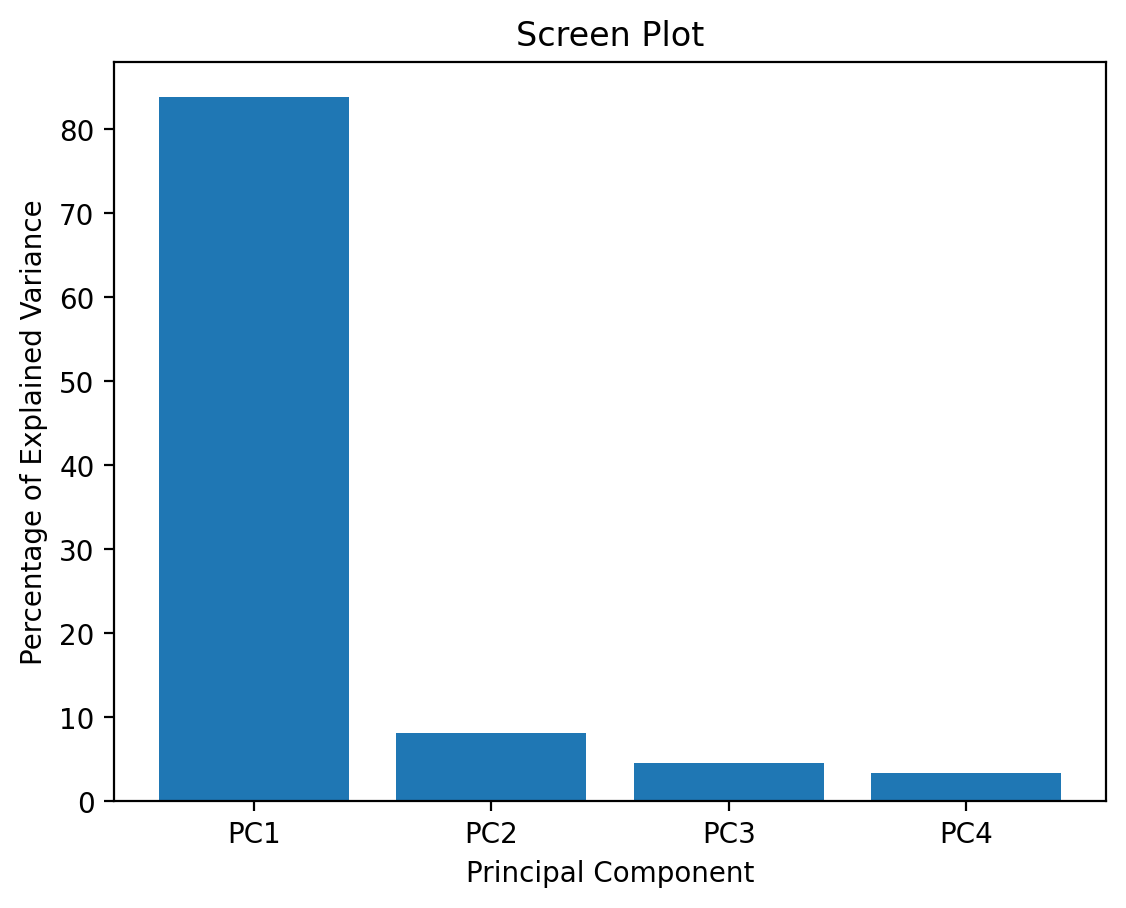

,PC1,PC2,PC3,PC4
[O/Fe],-0.503700,-0.485900,-0.226300,0.677400
[Na/Fe],0.503600,0.389200,-0.631600,0.442700
[Mg/Fe],-0.510500,0.136500,-0.679600,-0.508800
[Si/Fe],0.481600,-0.770500,-0.296700,-0.293700


In [12]:
X = star[cols]
scaler = StandardScaler()       #ปรับค่าให้เป็นมาตราฐานเดียวกัน
X_t = scaler.fit_transform(X)

dz = pd.DataFrame(X_t.round(4), columns=[f'z_{col}' for col in cols])

pca = PCA(n_components = 4)

pca_star = pca.fit_transform(X_t)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels1 = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels1)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

pca.components_ # Eigenvector

dpc = pd.DataFrame(pca.components_.T,
                   index = cols,
                   columns = [f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) # Eigenvector
dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

[O/Fe]     0.337540
[Na/Fe]    0.222387
[Mg/Fe]    0.156111
[Si/Fe]    0.054286
dtype: float64
[Fe/H]I  0.026298517844477957
[Fe/H]I  0.031634211773303694


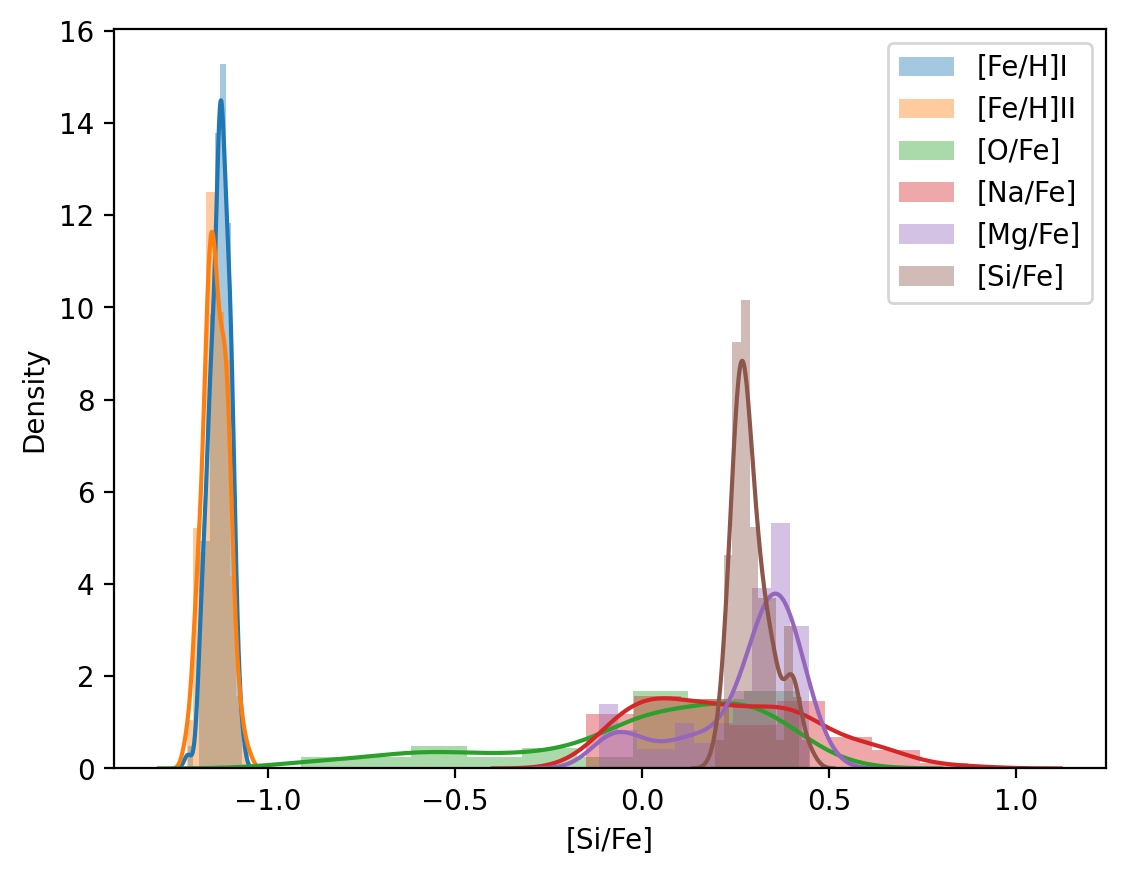

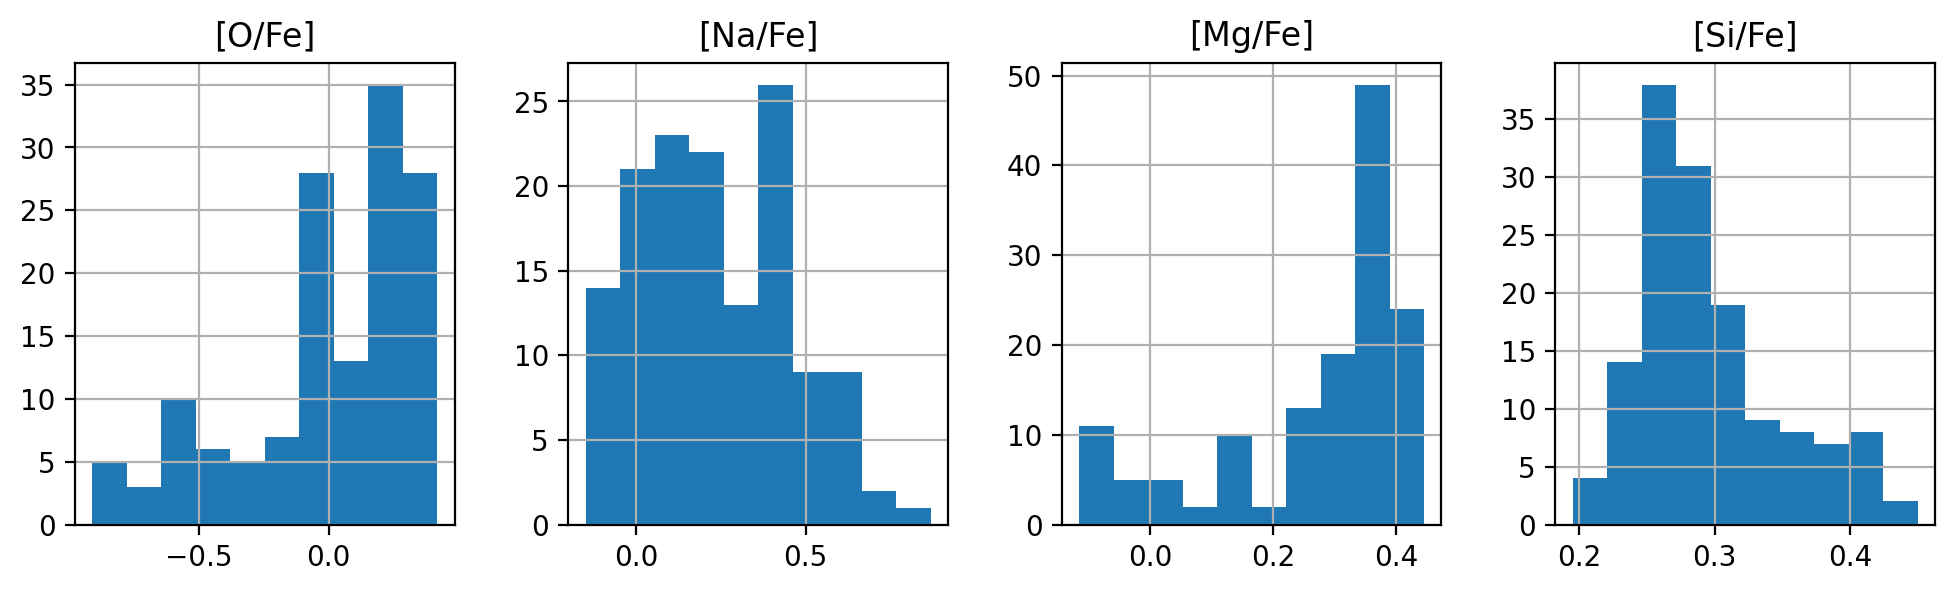

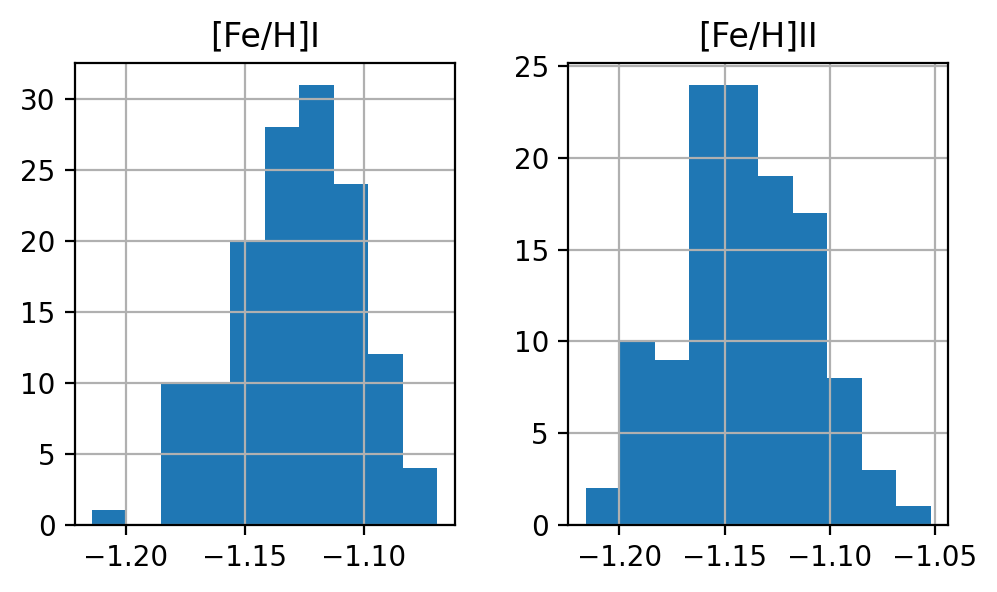

In [13]:
sns.distplot(star1['[Fe/H]I'], kde=True, label='[Fe/H]I')
sns.distplot(star1['[Fe/H]II'], kde=True, label='[Fe/H]II')
sns.distplot(star['[O/Fe]'], kde=True, label='[O/Fe]')
sns.distplot(star['[Na/Fe]'], kde=True, label='[Na/Fe]')
sns.distplot(star['[Mg/Fe]'], kde=True, label='[Mg/Fe]')
sns.distplot(star['[Si/Fe]'], kde=True, label='[Si/Fe]')
plt.legend()

star[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3));
star1[cols1].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3));

sd1 = np.std(star)
sd2 = np.std(star1['[Fe/H]I'])
sd3 = np.std(star1['[Fe/H]II'])
print(sd1)
print('[Fe/H]I ', sd2)
print('[Fe/H]I ', sd3)

Text(0, 0.5, 'PC2 - 8.2%')

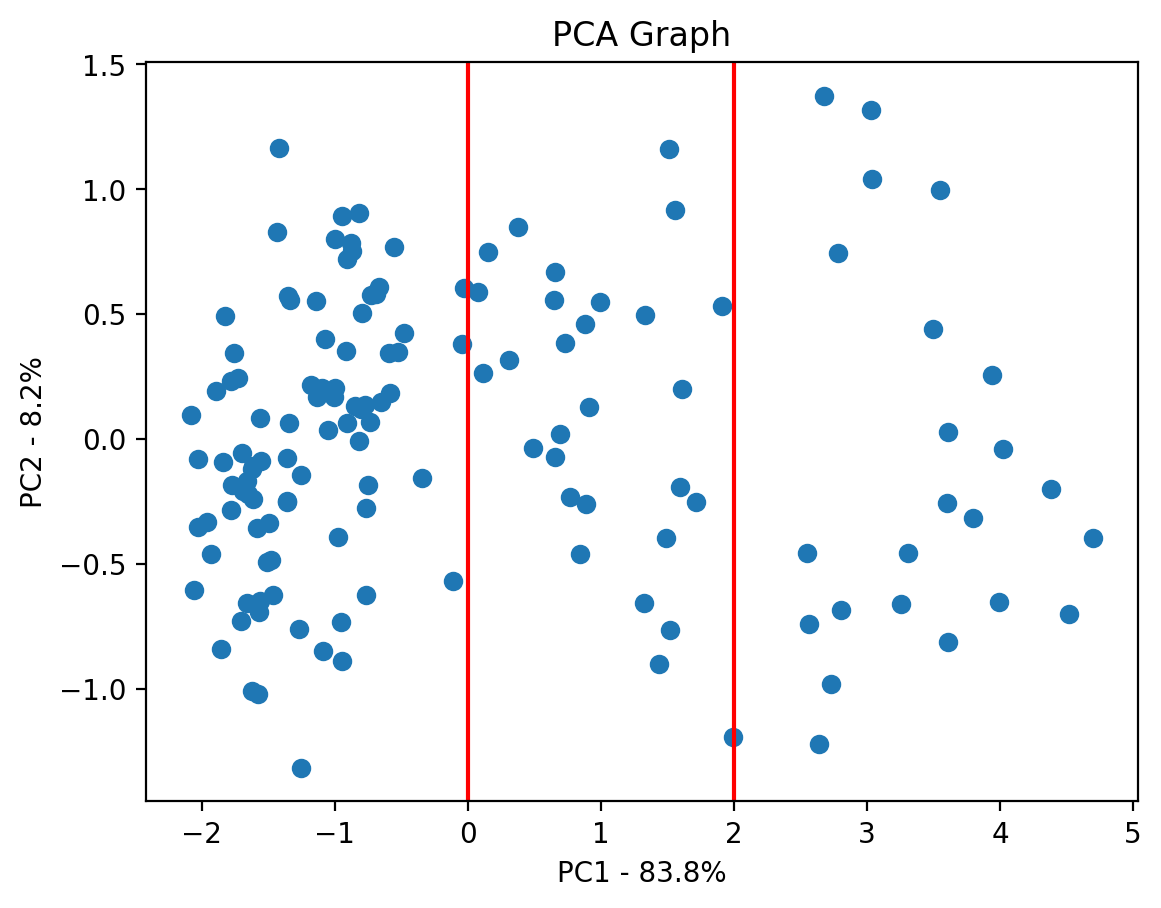

In [14]:
x_p3 = [0, 2]
pca_df = pd.DataFrame(pca_star, index=z, columns=labels1)
plt.scatter(pca_df.PC1, pca_df.PC2) #เลือก PC1 และ PC2 เนื่องจากให้ค่า Percentage of Explained Variance ที่สูง
for xp3 in x_p3:
  plt.axvline(xp3,color='r')
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [15]:
def cluster1():
  x = []
  for i in pca_df.index:
    if pca_df.PC1[i] < 0:
      x.append('a')
    elif 0< pca_df.PC1[i] < 2:
      x.append('b')
    else:
      x.append('c')
  return x

cl = cluster1()

star['group'] = cl

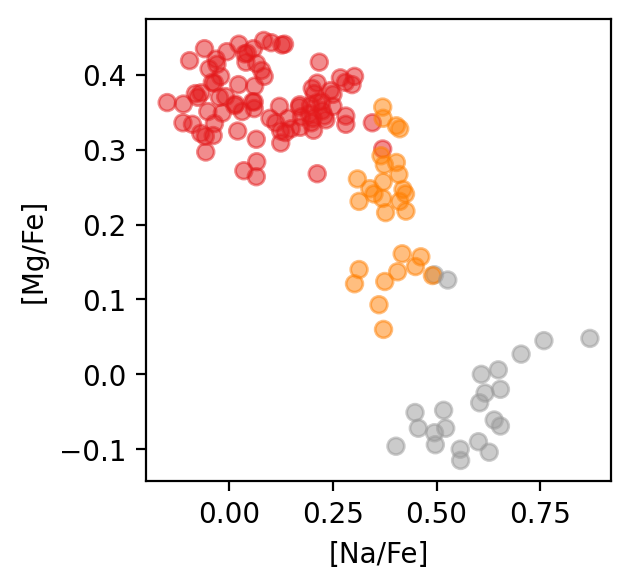

In [16]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax.scatter(star['[Na/Fe]'], star['[Mg/Fe]'], alpha=.5, cmap='Set1', c=star.group.astype('category').cat.codes)
ax.set_xlabel('[Na/Fe]')
ax.set_ylabel('[Mg/Fe]')
plt.show()

Text(0, 0.5, 'PC2 - 8.2%')

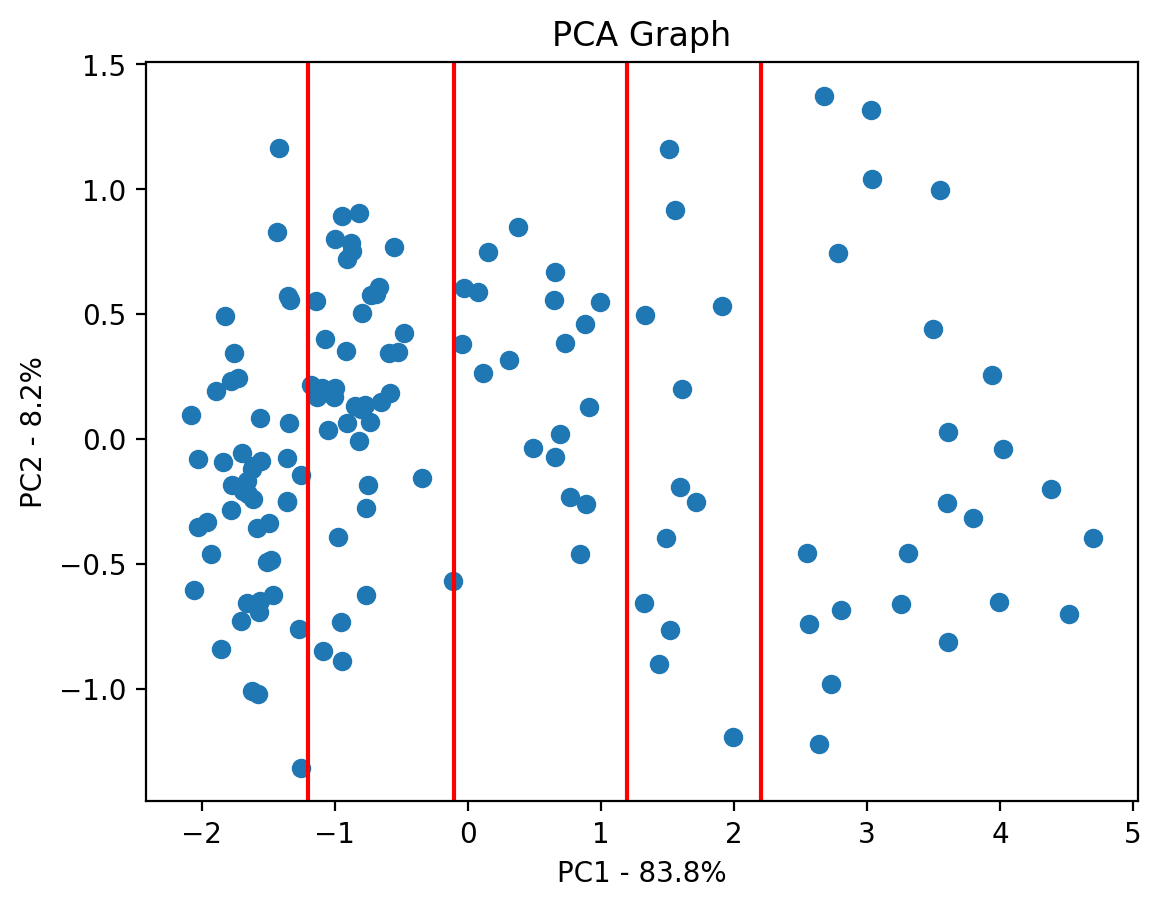

In [17]:
x_p5 = [-1.2, -0.1, 1.2, 2.2]
pca_df = pd.DataFrame(pca_star, index=z, columns=labels1)
plt.scatter(pca_df.PC1, pca_df.PC2) #เลือก PC1 และ PC2 เนื่องจากให้ค่า Percentage of Explained Variance ที่สูง
for xp5 in x_p5:
  plt.axvline(xp5,color='r')
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [18]:
def cluster1():
  x = []
  for i in pca_df.index:
    if pca_df.PC1[i] < -1.2:
      x.append('a')
    elif -1.2 <= pca_df.PC1[i] < -0.1:
      x.append('b')
    elif -0.1 <= pca_df.PC1[i] < 1.2:
      x.append('c')
    elif 1.2 <= pca_df.PC1[i] < 2.2:
      x.append('d')
    else:
      x.append('e')
  return x

cl = cluster1()

star['group'] = cl

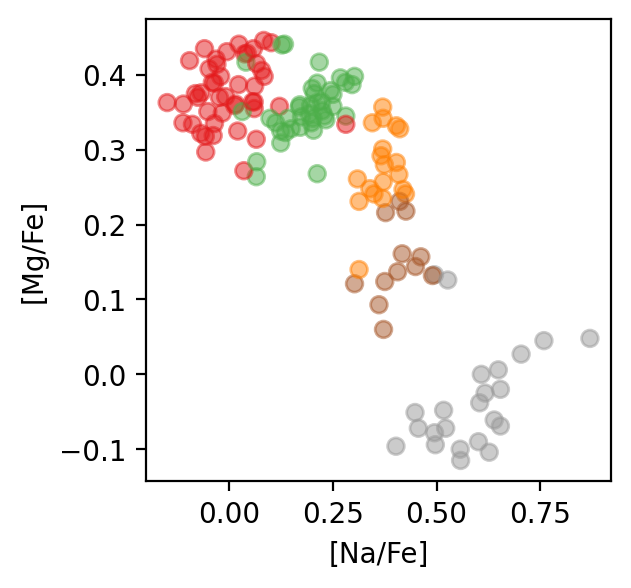

In [19]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax.scatter(star['[Na/Fe]'], star['[Mg/Fe]'], alpha=.5, cmap='Set1', c=star.group.astype('category').cat.codes)
ax.set_xlabel('[Na/Fe]')
ax.set_ylabel('[Mg/Fe]')
plt.show()